## P1: data set exploration

### Loading data sets

In [90]:
import pandas as pd
import urllib.parse


In [91]:
articles = pd.read_table("articles.tsv", skiprows=11, header=None).copy()
articles.columns = ["article"]
articles['article'] = articles['article'].apply(lambda x: urllib.parse.unquote(x, encoding='utf-8')).copy()
articles.head()

,article
0,Áedán_mac_Gabráin
1,Åland
2,Édouard_Manet
3,Éire
4,Óengus_I_of_the_Picts


In [92]:
# FORMAT:   linkSource   linkTarget
links = pd.read_table("links.tsv", skiprows=13, header=None).copy()
links.columns = ["linkSource", "linkTarget"]
links["linkSource"] = links["linkSource"].apply(lambda x: urllib.parse.unquote(x, encoding='utf-8')).copy()
links["linkTarget"] = links["linkTarget"].apply(lambda x: urllib.parse.unquote(x, encoding='utf-8')).copy()
links.head()

,linkSource,linkTarget
0,Áedán_mac_Gabráin,Columba
1,Áedán_mac_Gabráin,Dál_Riata
2,Áedán_mac_Gabráin,Great_Britain
3,Áedán_mac_Gabráin,Ireland
4,Áedán_mac_Gabráin,Isle_of_Man


In [93]:
# FORMAT:   hashedIpAddress   timestamp   durationInSec   path   rating
# back clicks are represented by < and articles in path are separated by ;
# rating are from 1 to 5
paths_finished = pd.read_table("paths_finished.tsv", skiprows=17, header=None).copy()
paths_finished.columns = ["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"]
paths_finished.head()


,hashedIpAddress,timestamp,durationInSec,path,rating
0,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
1,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
2,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
3,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
4,5295bca242be81fe,1372890414,110,14th_century;Europe;North_America;United_State...,NaN


In [94]:
# FORMAT:   hashedIpAddress   timestamp   durationInSec   path   target   type
# "timeout" means that no click was made for 30 minutes;
# "restart" means that the user started a new game without finishing the current one.

paths_unfinished = pd.read_table("paths_unfinished.tsv", skiprows=16, header=None).copy()
paths_unfinished.columns = ["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"]
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


In [95]:
# FORMAT:   article   category
# categories are separated by . for a given article 
categories = pd.read_table("categories.tsv", skiprows=14, header=None).copy()
categories.columns = ["article","category"]
categories["article"] = categories["article"].apply(lambda x: urllib.parse.unquote(x, encoding='utf-8')).copy()
categories["category"] = categories["category"].apply(lambda x: x.removeprefix("subject.")).copy()
categories.head()

,article,category
0,Áedán_mac_Gabráin,People.Historical_figures
1,Åland,Countries
2,Åland,Geography.European_Geography.European_Countries
3,Édouard_Manet,People.Artists
4,Éire,Countries


### Word clouds

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Function to create a word cloud and display it
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)
    #plt.figure(figsize=(5, 2.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

In [97]:
categories["article"].nunique()

4598

In [98]:
len(categories)

5203

There ~700 articles present more than once in the categories file.

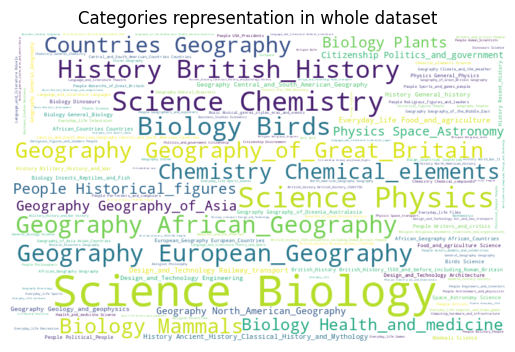

In [99]:
categories["category_str"] = categories["category"].apply(lambda x: x.replace("."," "))
create_wordcloud(' '.join(categories["category_str"]), "Categories representation in whole dataset")


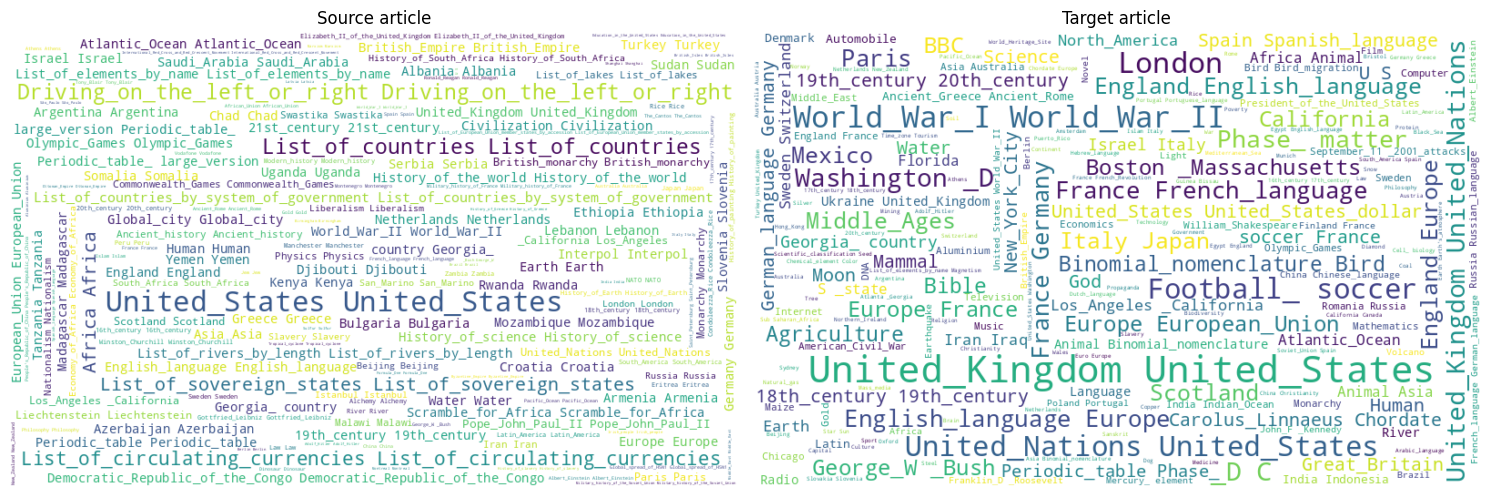

In [100]:
target_string = ' '.join(links['linkTarget'])

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
create_wordcloud(' '.join(links['linkSource']), 'Source article')
plt.subplot(1, 2, 2)
create_wordcloud(' '.join(links['linkTarget']), 'Target article')

plt.tight_layout()
plt.show()

####  Finished/unfinished paths

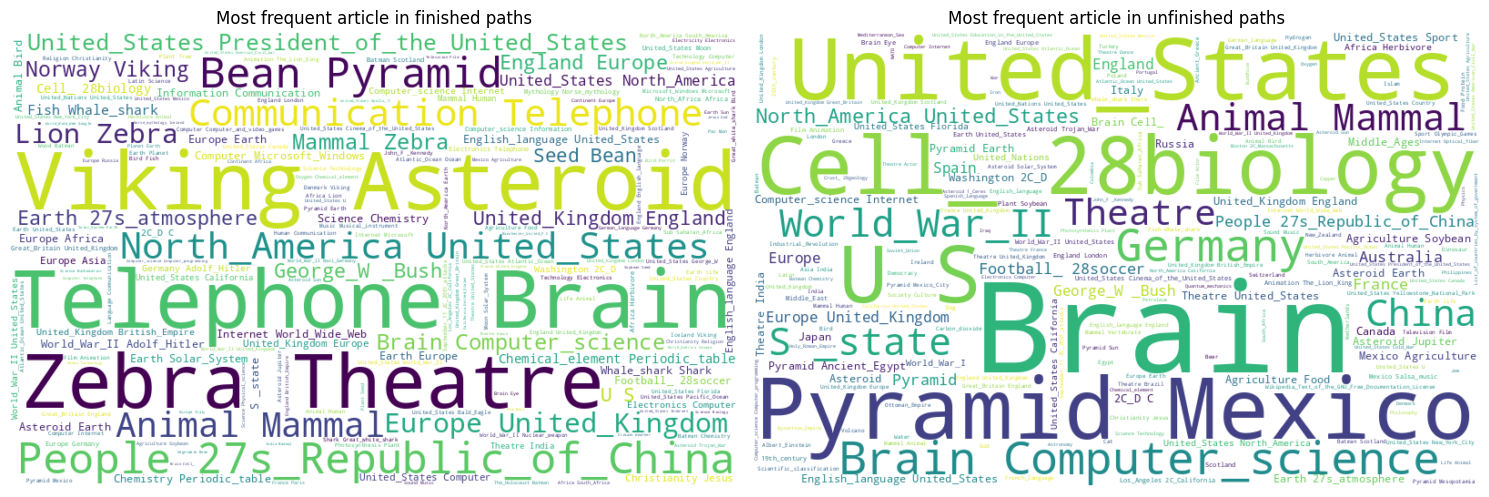

In [101]:
paths_finished["path_str"] = paths_finished["path"].apply(lambda x: x.replace(";"," "))
paths_unfinished["path_str"] = paths_unfinished["path"].apply(lambda x: x.replace(";"," "))

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
create_wordcloud(' '.join(paths_finished["path_str"]), "Most frequent article in finished paths")
plt.subplot(1, 2, 2)
create_wordcloud(' '.join(paths_unfinished["path_str"]), "Most frequent article in unfinished paths")

plt.tight_layout()
plt.show()

#### Countries 

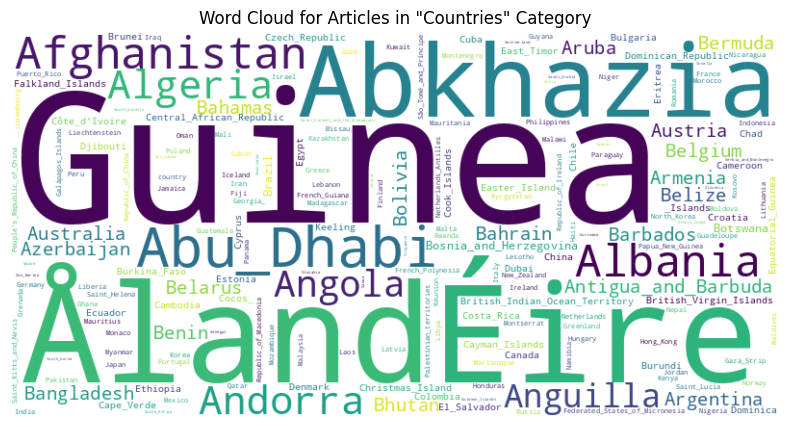

,hashedIpAddress,timestamp,durationInSec,path,rating,path_str,article,category,category_str
0,43f864c75b2571b5,1350587401,0,Lesotho,NaN,Lesotho,Lesotho,Geography.African_Geography.African_Countries,Geography African_Geography African_Countries
1,43f864c75b2571b5,1350587401,0,Lesotho,NaN,Lesotho,Lesotho,Countries,Countries
2,5590014e126275b4,1225696755,0,Moon,NaN,Moon,Moon,Science.Physics.Space_Astronomy,Science Physics Space_Astronomy
3,43f864c75b2571b5,1350587395,0,Coal,NaN,Coal,Coal,Citizenship.Environment,Citizenship Environment
4,43f864c75b2571b5,1350587395,0,Coal,NaN,Coal,Coal,Geography.Mineralogy,Geography Mineralogy
5,43f864c75b2571b5,1350587389,0,Pyramid,NaN,Pyramid,Pyramid,Design_and_Technology.Architecture,Design_and_Technology Architecture
6,321e4b101c5b58ff,1225726660,0,Apple,NaN,Apple,Apple,Everyday_life.Food_and_agriculture,Everyday_life Food_and_agriculture
7,43f864c75b2571b5,1350587377,0,Snow_Goose,NaN,Snow_Goose,Snow_Goose,Science.Biology.Birds,Science Biology Birds
8,43f864c75b2571b5,1350587420,0,Royal_Navy,NaN,Royal_Navy,Royal_Navy,History.Military_History_and_War,History Military_History_and_War
9,43f864c75b2571b5,1350587367,0,Abel_Tasman,NaN,Abel_Tasman,Abel_Tasman,People.Geographers_and_explorers,People Geographers_and_explorers
